In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
news=pd.read_csv ("D://Data Science/Data/NewspaperData.csv")

In [4]:
news.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [5]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


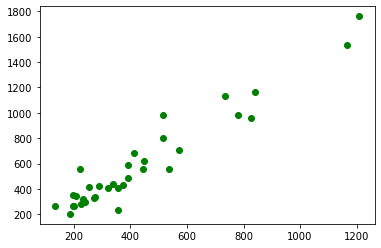

In [6]:
plt.scatter(news.daily,news.sunday, c='green')

In [7]:
news.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


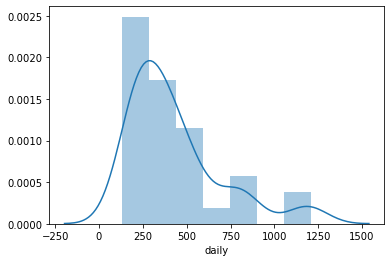

In [8]:
sns.distplot(news.daily)

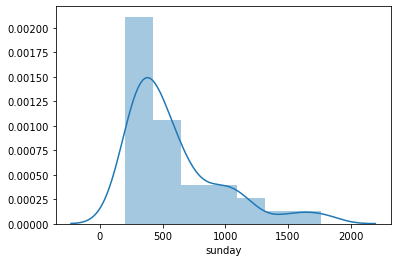

In [9]:
sns.distplot(news['sunday'])

In [10]:
model1=smf.ols('sunday~daily',data=news).fit()
model1

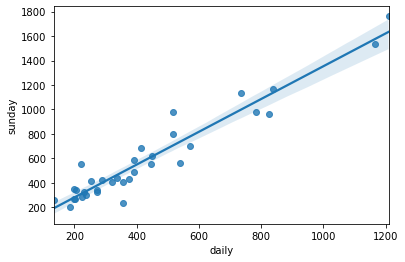

In [11]:
sns.regplot(x='daily',y='sunday', data=news)

In [12]:
model1.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           6.02e-19
Time:                        18:08:43   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-values -Check the significance intercept(> Alpha) is not significance but daily is significance
F value - Less than alpha, Significance.
Over all model is good
R-squared: Accuracy of the model

In [22]:
print(model1.tvalues,'\n', model1.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [25]:
print(model1.rsquared,'\n',model1.rsquared_adj)

0.9180596895873295 
 0.9154990548869336


In [35]:
news1=pd.Series([200,500])
news1

0    200
1    500
dtype: int64

In [36]:
news_pred=pd.DataFrame(news1,columns=['daily'])
news_pred

,daily
0,200
1,500


In [37]:
model1.predict(news_pred)

0    281.778581
1    683.693009
dtype: float64

In [16]:
pred1=model1.predict(news.daily)
pred1

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [19]:
!pip install ml_metrics

  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7852 sha256=6e611a0809e4194bb669b6a256da4f9e60a8f35af90d5c84a2a1a1cfc95ba118
  Stored in directory: c:\users\jeysu_000\appdata\local\pip\cache\wheels\09\2d\e7\58a96e635aedc543a3a78ff855dc9911d98fc1640e3921c823
Successfully built ml-metrics


In [21]:
#Error should be least than the new model
from ml_metrics import rmse
rmse(pred1,news.sunday)

106.15409588066541

In [39]:
wc=pd.read_csv ("D://Data Science/Data/WC_AT.csv")
wc

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [40]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


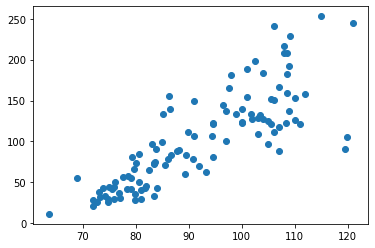

In [43]:
plt.scatter(wc.Waist,wc.AT)

In [42]:
wc.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [58]:
wcm1=smf.ols('AT~Waist',data=wc).fit()

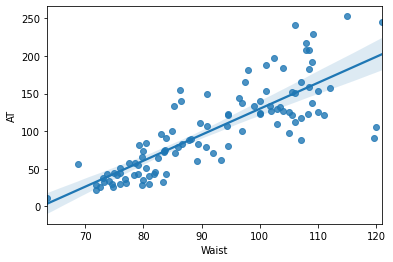

In [59]:
sns.regplot(x='Waist',y='AT',data=wc)

In [60]:
wcm1.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [61]:
wcm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           1.62e-27
Time:                        22:34:10   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
wc1=pd.Series([75,50,100])
wc1

0     75
1     50
2    100
dtype: int64

In [69]:
wc1_pred=pd.DataFrame(wc1,columns=['Waist'])

In [71]:
pred=wcm1.predict(wc1_pred)
pred

0     43.432966
1    -43.038518
2    129.904451
dtype: float64

    wc1=pd.Series([75,35,90])